In [45]:
import pandas as pd
pd.options.display.max_colwidth = 80

In [46]:
df = pd.read_csv("dataset.csv")
df['Title'] = df['Title'].str.replace('"','')
df.rename(columns = {"No. inseason" : "episode","U.S. viewers(millions)" : "Viewership"},inplace=True)
df.drop(columns=['No.overall','Unnamed: 0'],inplace=True)

In [47]:
df.head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season
0,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9.52,1
1,2,The Big Bran Hypothesis,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : Robert Cohen & Dave Goetsch,2007-10-01,3T6601,8.58,1
2,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by : Chuck LorreTeleplay by : Bill Prady & Steven Molaro,2007-10-08,3T6602,8.36,1
3,4,The Luminous Fish Effect,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : David Litt & Lee Aronsohn,2007-10-15,3T6603,8.15,1
4,5,The Hamburger Postulate,Andrew D. Weyman,Story by : Jennifer GlickmanTeleplay by : Dave Goetsch & Steven Molaro,2007-10-22,3T6604,8.81,1


In [48]:
df1 = pd.read_csv("1_10_seasons_tbbt.csv")
df1['Season'] = df1['episode_name'].str.extract(r'Series (\d+)').astype('int')
df1['episode'] = df1['episode_name'].str.extract(r'Episode (\d+)').astype('int')

In [49]:
df1.head()

,episode_name,dialogue,person_scene,Season,episode
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene,1,1
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane with two slits in it and either ...,Sheldon,1,1
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,1,1
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good idea for a tee-shirt.",Sheldon,1,1
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,1,1


In [50]:
df2 = pd.merge(df1, df, on=['Season','episode'], how='inner')
df2.drop(columns = ['episode_name','Directed by','Written by','Original air date','Prod.code','Viewership'],inplace=True)
df2.head()

,dialogue,person_scene,Season,episode,Title
0,A corridor at a sperm bank.,Scene,1,1,Pilot
1,So if a photon is directed through a plane with two slits in it and either ...,Sheldon,1,1,Pilot
2,"Agreed, what’s your point?",Leonard,1,1,Pilot
3,"There’s no point, I just think it’s a good idea for a tee-shirt.",Sheldon,1,1,Pilot
4,Excuse me?,Leonard,1,1,Pilot


In [51]:
df3 = pd.read_csv('big_bang_theory_imdb.csv')
df3 = df3.iloc[1:, :]
df3.drop(columns = ['season','episode_num','title','original_air_date','desc'],inplace=True)
df3 = df3.reset_index()
df3.drop(columns=['index'],inplace=True)

In [52]:
df3.head()

,imdb_rating,total_votes
0,8.2,6135
1,8.3,4924
2,7.7,4392
3,8.1,4434
4,7.9,4227


In [53]:
df = pd.concat([df,df3],axis=1)
df.head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
0,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9.52,1,8.2,6135
1,2,The Big Bran Hypothesis,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : Robert Cohen & Dave Goetsch,2007-10-01,3T6601,8.58,1,8.3,4924
2,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by : Chuck LorreTeleplay by : Bill Prady & Steven Molaro,2007-10-08,3T6602,8.36,1,7.7,4392
3,4,The Luminous Fish Effect,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : David Litt & Lee Aronsohn,2007-10-15,3T6603,8.15,1,8.1,4434
4,5,The Hamburger Postulate,Andrew D. Weyman,Story by : Jennifer GlickmanTeleplay by : Dave Goetsch & Steven Molaro,2007-10-22,3T6604,8.81,1,7.9,4227


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

##Overall Analysis

Analysing the number of episodes directed by different directors throughout the 12 seasons

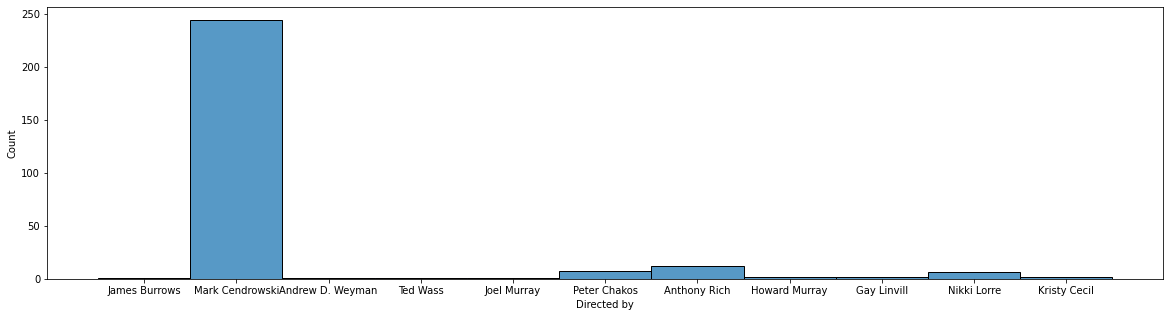

In [55]:
plt.figure(figsize=(20,5))
sns.histplot(x='Directed by',data=df)

Most of the episodes are directed by Mark Cendrowski

Order of episodes based on imdb_rating

In [56]:
df.sort_values('imdb_rating',ascending=False).head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
278,24,The Stockholm Syndrome,Mark Cendrowski,Chuck Lorre & Steve Holland & Steven Molaro & Bill Prady & Dave Goetsch & Er...,2019-05-16,T12.16024,18.5,12,9.5,8791
27,11,The Bath Item Gift Hypothesis,Mark Cendrowski,Story by : Bill Prady & Richard RosenstockTeleplay by : Stephen Engel & Eric...,2008-12-15,3T7361,11.4,2,9.1,5982
277,23,The Change Constant,Mark Cendrowski,Chuck Lorre & Steve Holland & Steven Molaro & Bill Prady & Dave Goetsch & Er...,2019-05-16,T12.16023,18.5,12,9.0,4352
254,24,The Bow Tie Asymmetry,Mark Cendrowski,Story by : Chuck Lorre & Steven Molaro & Maria FerrariTeleplay by : Steve Ho...,2018-05-10,T12.15624,15.5,11,9.0,3543
193,11,The Opening Night Excitation,Mark Cendrowski,Story by : Steven Molaro & Eric Kaplan & Tara HernandezTeleplay by : Steve H...,2015-12-17,4X7211,18.2,9,9.0,4706


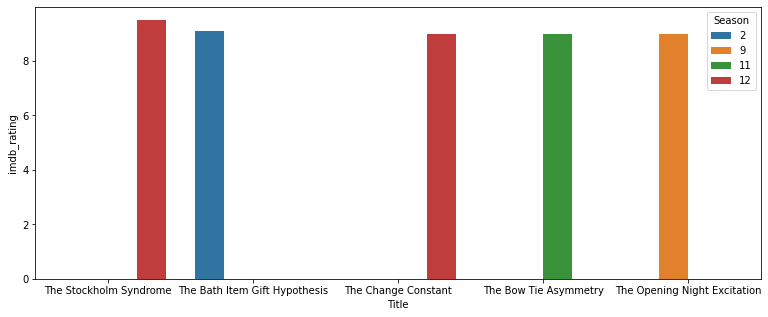

In [58]:
b = df.sort_values(by ='imdb_rating', ascending = False).head()
plt.figure(figsize=(13,5))
sns.barplot(x='Title',y='imdb_rating', hue='Season',data=b)

Order of episodes based on Viewership

In [12]:
df.sort_values('Viewership',ascending=False).head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
136,2,The Deception Verification,Mark Cendrowski,Story by : Chuck Lorre & Eric Kaplan & Jim ReynoldsTeleplay by : Steven Mola...,2013-09-26,4X5302,20.4,7,8.0,3374
147,13,The Occupation Recalibration,Mark Cendrowski,Story by : Eric Kaplan & Maria Ferrari & Tara HernandezTeleplay by : Steven ...,2014-01-09,4X5313,20.3,7,7.6,2835
123,13,The Bakersfield Expedition,Mark Cendrowski,Story by : Chuck Lorre & Jim Reynolds & Steve HollandTeleplay by : Steven Mo...,2013-01-10,3X7613,20.0,6,8.4,3496
122,12,The Egg Salad Equivalency,Mark Cendrowski,Story by : Chuck Lorre & Eric Kaplan & Jim ReynoldsTeleplay by : Steven Mola...,2013-01-03,3X7612,19.2,6,8.4,3489
146,12,The Hesitation Ramification,Mark Cendrowski,Story by : Dave Goetsch & Jim Reynolds & Tara HernandezTeleplay by : Steven ...,2014-01-02,4X5312,19.2,7,7.5,2859


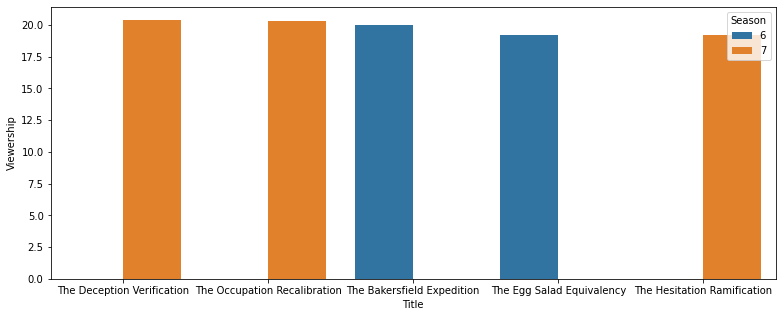

In [35]:
a = df.sort_values(by ='Viewership', ascending = False).head()
plt.figure(figsize=(13,5))
sns.barplot(x='Title',y='Viewership', hue='Season',data=a)

Of the top 5 most viewed episodes 3 are from 7th Season and 2 are from 6th Season and all directed by the same director. 

In [14]:
df.sort_values('Viewership').head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
16,17,The Tangerine Factor,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : Lee Aronsohn & Steven Molaro,2008-05-19,3T6616,7.34,1,8.5,4101
14,15,The Shiksa Indeterminacy[28]The Pork Chop Indeterminacy[29],Mark Cendrowski,Story by : Chuck LorreTeleplay by : Lee Aronsohn & Bill Prady,2008-05-05,3T6614,7.38,1,8.2,4153
12,13,The Bat Jar Conjecture,Mark Cendrowski,Story by : Stephen Engel & Jennifer GlickmanTeleplay by : Bill Prady & Rober...,2008-04-21,3T6612,7.51,1,8.3,4015
11,12,The Jerusalem Duality,Mark Cendrowski,Story by : Jennifer Glickman & Stephen EngelTeleplay by : Dave Goetsch & Ste...,2008-04-14,3T6611,7.69,1,7.9,3902
15,16,The Peanut Reaction,Mark Cendrowski,Story by : Bill Prady & Lee AronsohnTeleplay by : Dave Goetsch & Steven Molaro,2008-05-12,3T6615,7.79,1,8.3,3914


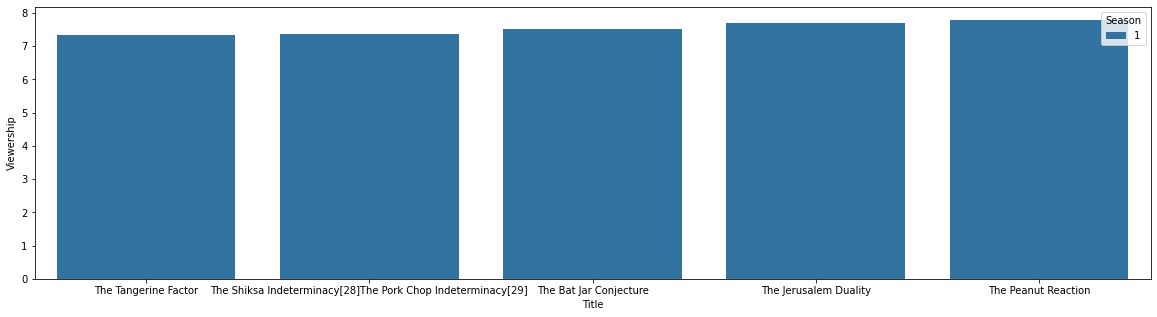

In [15]:
b = df.sort_values(by ='Viewership', ascending = True).head()
plt.figure(figsize=(20,5))
sns.barplot(x='Title',y='Viewership', hue='Season',data=b)

It is no doubt that the least viewed episodes are in Season 1

Order of Season in terms of Average Viewership

In [16]:
dfa = df.groupby(['Season']).Viewership.mean().reset_index()
dfa

,Season,Viewership
0,1,8.443529
1,2,10.129565
2,3,14.069565
3,4,12.520833
4,5,14.841667
5,6,16.754167
6,7,17.650000
7,8,17.450000
8,9,17.666667
9,10,16.620833


Text(0.5, 1.0, 'SEASON - VIEWERSHIP')

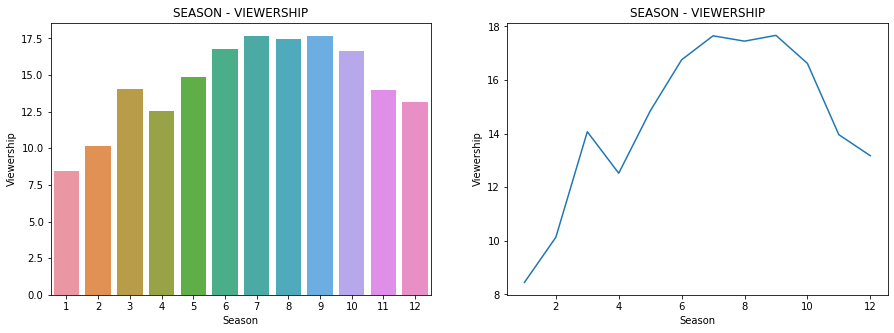

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='Season',y='Viewership',data=dfa)
plt.title('SEASON - VIEWERSHIP')
plt.subplot(1,2,2)
sns.lineplot(x='Season',y='Viewership',data=dfa)
plt.title('SEASON - VIEWERSHIP')

From 4th season the viewership began to steadily increase and then From 9th Season the Average Viewership began to drop till the final
Season

Most watched Season = 9th Season

Least watched Season = 1st Season

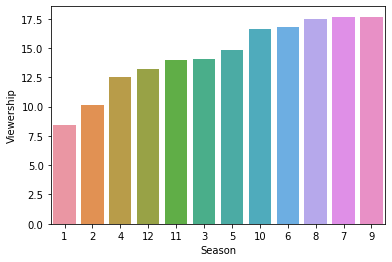

In [18]:
sns.barplot(x='Season',y='Viewership',data=dfa,order=dfa.sort_values('Viewership').Season)

Order of Season in terms of Average imdb rating

In [19]:
dfr = df.groupby(['Season']).imdb_rating.mean().reset_index()
dfr

,Season,imdb_rating
0,1,8.141176
1,2,8.239130
2,3,8.256522
3,4,8.108333
4,5,7.995833
5,6,8.000000
6,7,7.904167
7,8,7.491667
8,9,7.583333
9,10,7.412500


Text(0.5, 1.0, 'SEASON - IMDB_RATING')

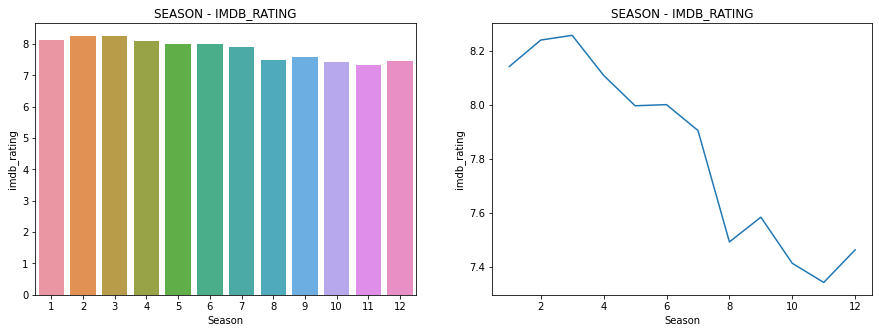

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='Season',y='imdb_rating',data=dfr)
plt.title('SEASON - IMDB_RATING')
plt.subplot(1,2,2)
sns.lineplot(x='Season',y='imdb_rating',data=dfr)
plt.title('SEASON - IMDB_RATING')

Almost from the 3rd Season the ratings are dropping

High rated Season = 3rd Season

Low rated Season = 11th Season

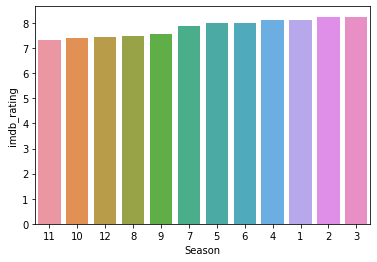

In [21]:
sns.barplot(x='Season',y='imdb_rating',data = dfr,order = dfr.sort_values('imdb_rating').Season)

Let's Analyse the top 5 Seasons according to Average Viewership - [9,7,8,6,10]

## ANALYSIS ON TOP SEASON

###SEASON 9

In [22]:
df.head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
0,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9.52,1,8.2,6135
1,2,The Big Bran Hypothesis,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : Robert Cohen & Dave Goetsch,2007-10-01,3T6601,8.58,1,8.3,4924
2,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by : Chuck LorreTeleplay by : Bill Prady & Steven Molaro,2007-10-08,3T6602,8.36,1,7.7,4392
3,4,The Luminous Fish Effect,Mark Cendrowski,Story by : Chuck Lorre & Bill PradyTeleplay by : David Litt & Lee Aronsohn,2007-10-15,3T6603,8.15,1,8.1,4434
4,5,The Hamburger Postulate,Andrew D. Weyman,Story by : Jennifer GlickmanTeleplay by : Dave Goetsch & Steven Molaro,2007-10-22,3T6604,8.81,1,7.9,4227


In [23]:
s9 = df[df['Season'] == 9]

Analysing Directors

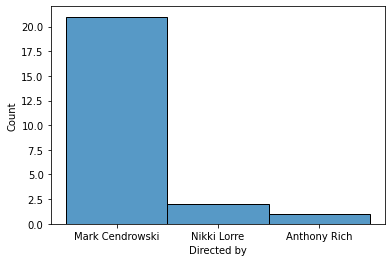

In [40]:
sns.histplot(x='Directed by',data=s9)

Finding Top 5 episodes in Season 9 by number of US viewers

In [24]:
s9.sort_values('Viewership',ascending=False).head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
192,10,The Earworm Reverberation,Mark Cendrowski,Story by : Eric Kaplan & Jim Reynolds & Saladin K. PattersonTeleplay by : St...,2015-12-10,4X7210,19.2,9,8.3,3089
198,16,The Positive Negative Reaction,Mark Cendrowski,Story by : Eric Kaplan & Jim Reynolds & Saladin K. PattersonTeleplay by : St...,2016-02-18,4X7216,19.0,9,7.4,2543
199,17,The Celebration Experimentation,Mark Cendrowski,Story by : Chuck Lorre & Eric Kaplan & Jeremy HoweTeleplay by : Steven Molar...,2016-02-25,4X7217,18.9,9,7.5,2564
189,7,The Spock Resonance,Nikki Lorre,Story by : Chuck Lorre & Jim Reynolds & Tara HernandezTeleplay by : Steven M...,2015-11-05,4X7206,18.8,9,8.0,2724
200,18,The Application Deterioration,Mark Cendrowski,Story by : Steven Molaro & Eric Kaplan & Adam FabermanTeleplay by : Steve Ho...,2016-03-10,4X7218,18.6,9,7.5,2411


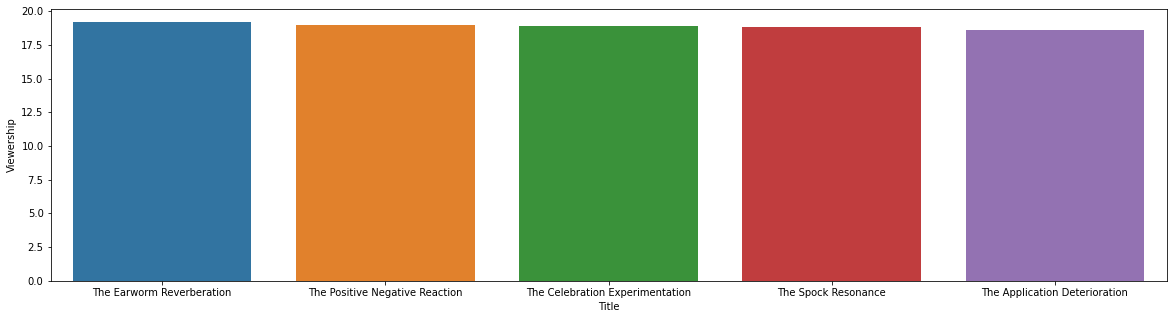

In [25]:
a9 = s9.sort_values(by ='Viewership', ascending = False).head()
plt.figure(figsize=(20,5))
sns.barplot(x='Title',y='Viewership',data=a9)

Text(0.5, 1.0, 'EPISODE - VIEWERSHIP')

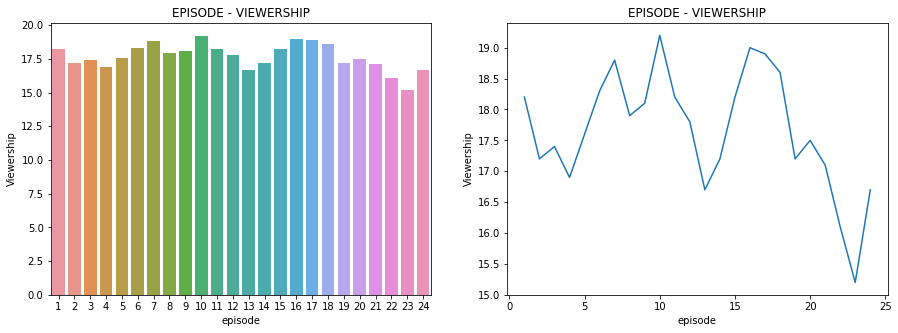

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='episode',y='Viewership',data=s9)
plt.title('EPISODE - VIEWERSHIP')
plt.subplot(1,2,2)
sns.lineplot(x='episode',y='Viewership',data=s9)
plt.title('EPISODE - VIEWERSHIP')

Finding top episodes in Season 9 by Rating

In [28]:
s9.sort_values('imdb_rating',ascending=False).head()

,episode,Title,Directed by,Written by,Original air date,Prod.code,Viewership,Season,imdb_rating,total_votes
193,11,The Opening Night Excitation,Mark Cendrowski,Story by : Steven Molaro & Eric Kaplan & Tara HernandezTeleplay by : Steve H...,2015-12-17,4X7211,18.2,9,9.0,4706
192,10,The Earworm Reverberation,Mark Cendrowski,Story by : Eric Kaplan & Jim Reynolds & Saladin K. PattersonTeleplay by : St...,2015-12-10,4X7210,19.2,9,8.3,3089
189,7,The Spock Resonance,Nikki Lorre,Story by : Chuck Lorre & Jim Reynolds & Tara HernandezTeleplay by : Steven M...,2015-11-05,4X7206,18.8,9,8.0,2724
190,8,The Mystery Date Observation,Mark Cendrowski,Story by : Steven Molaro & Eric Kaplan & Jim ReynoldsTeleplay by : Chuck Lor...,2015-11-12,4X7208,17.9,9,8.0,2729
206,24,The Convergence Convergence,Mark Cendrowski,Story by : Steven Molaro & Tara Hernandez & Adam FabermanTeleplay by : Chuck...,2016-05-12,4X7224,16.7,9,7.8,2571


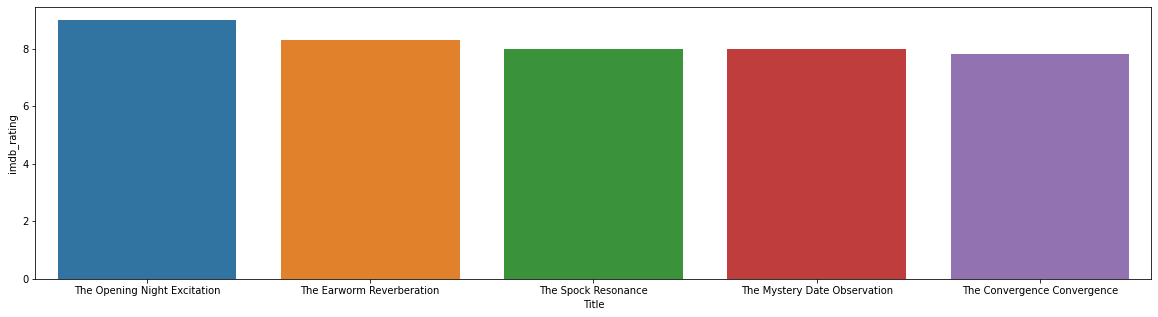

In [29]:
r9 = s9.sort_values(by ='imdb_rating', ascending = False).head()
plt.figure(figsize=(20,5))
sns.barplot(x='Title',y='imdb_rating',data=r9)

Text(0.5, 1.0, 'EPISODE - IMDB_RATING')

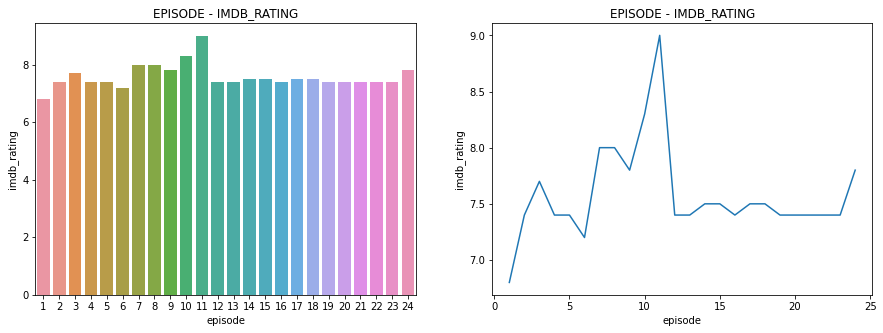

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='episode',y='imdb_rating',data=s9)
plt.title('EPISODE - IMDB_RATING')
plt.subplot(1,2,2)
sns.lineplot(x='episode',y='imdb_rating',data=s9)
plt.title('EPISODE - IMDB_RATING')

11th episode is significantly rated higher than all the other episode.


This is the episode Sheldons decides to get intimate with Amy as a gift for her Birthday


1st episode is the lowest rated episode of the 9th season.


This is the episode where Leonard and penny elopes to Vegas for their Marriage ceremony